# Graph Theory (Network Analysis)
F. Burkholder
(credits: Moses Marsh, Matt Drury, Jonathan Torrez, Ivan Corneillet)

## Installation Instructions:

Install networkx version 2.3 (nxpd doesn't work with 2.4)  
`$ conda install networkx=2.3 -c https://conda.anaconda.org/conda-forge/`


You will need to install the following modules and utilities to get this notebook to run


`pip install nxpd`

 - Mac OS: `brew install graphviz`
 - Linux: `sudo apt-get install graphviz`

`git clone https://github.com/taynaud/python-louvain/`

`cd python-louvain`

`python setup.py install`


## Graphs Introduction

### Objectives

- What is a graph?
- What are some data structures used to represent graphs?
- How do you talk about graphs?
  - Degree
  - Neighbors
  - Path
  - Cycle
  - Components
- What are some types of graphs?
  - Connected vs. disconnected
  - Directed vs. undirected
  - Weighted vs. unweighted
  - Trees
- How do you search / traverse a graph?
  - Breadth First vs Depth First Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from collections import deque
from itertools import product

# Standard Python Library for working with graphs
import networkx as nx

# Helper library to visualize graphs
import nxpd

# Helper library for community related functions
import community

# Custom module that Matthew Drury wrote (GraphTools.py)
import GraphTools as gt

plt.style.use('ggplot')
%matplotlib inline

## What is a graph?
A graph is a structure comprised of a set of objects (**nodes**) where some of the objects have a relationship between each other (**edges**).

<img src="images/undirected_graph.png" alt="Drawing" style="width: 300px;"/>

**Nodes** (or **vertices**) 1 through 6, and the connections between them (**edges**). 

Maybe the nodes are people and the edges represent friendship.   
[Here's](https://github.com/gschool/dsi-welcome/blob/master/readings/Social_Network_Analysis_for_Startups.pdf) a whole book on analyzing **social networks** using graphs.

### A social graph from Facebook:

<img src="images/facebook-social-graph.jpg" alt="Drawing" style="width: 600px;"/>

- **Nodes** are facebook profiles
- **Edges** are friend connections

### Game of thrones

<img src="images/game_of_thrones.png" alt="Drawing" style="width: 700px;"/>
source: https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20(1).pdf  
explanation of PageRank: http://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm

### Computer connectivity across the Internet:

<img src="images/internet.png" alt="Drawing" style="width: 500px;"/>

- **Nodes** are computers
- **Edges** are direct connections from one computer to another

source: http://www.opte.org/the-internet/



### Paris' Metro:

<img src="images/paris-metro.gif" alt="Drawing" style="width: 700px;"/>

- **Nodes** are subway stations
- **Edges** are subway connections

Graphs are mathematical abstractions; the pictures are only there to help our brains comprehend the data.

The **actual** Paris subway's geographic structure look like this:
<img src="images/paris-metro-geo.jpg" alt="Drawing" style="width: 700px;"/>


### Food web
<img src="images/food_web.png" alt="Drawing" style="width: 700px;"/>
[source](https://www.flickr.com/photos/121935927@N06/13578885414)

### What kinds of relationships can we represent?
<img src="images/undirected_graph.png" alt="Drawing" style="width: 350px;"/>  
In an **undirected graph**, edges represent two-way relationships (e.g. friendships, communications)  

<img src="images/directed-graph_2.png" alt="Drawing" style="width: 400px;"/>
In a **directed graph**, edges represent one-way relationships (e.g. Twitter followers, phone calls)



<img src="images/airport_graph.gif" alt="Drawing" style="width: 500px;"/>

In a **weighted graph**, edges also have a number (usually some kind of **cost**) associated with them.

## Breakout
Can you think of something that could be represented by an undirected weighted graph?

### A bit of history
The original graph: the **Seven Bridges of Königsberg** ([wiki](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)):
<img src="images/konigsberg.png" alt="Drawing" style="width: 400px;"/>

<img src="images/konigsberg_graph.png" alt="Drawing" style="width: 400px;"/>

Wikipedia:  
"Euler pointed out that the choice of route inside each land mass is irrelevant. The only important feature of a route is the sequence of bridges crossed. This allowed him to reformulate the problem in abstract terms (laying the foundations of **graph theory**), eliminating all features except the list of land masses and the bridges connecting them. In modern terms, one replaces each land mass with an abstract "**vertex**" or **node**, and each bridge with an abstract connection, an "**edge**", which only serves to record which pair of vertices (land masses) is connected by that bridge. The resulting mathematical structure is called a **graph**.   

**Discussion:** Is it possible to walk around the city, crossing every bridge, but each *exactly* once?  
(see wiki for answer)

### Back to formalities
Formally, a graph $G$ is:

- A set $N$ of **nodes**.  Nodes are abstract entities, can represent pretty much anything, and can have data attached
- A set $E$ of **edges**, which are directed or undirected pairs of nodes

The number of vertices (nodes) $|V|$ is the order of the graph.

The number of edges $|E|$ is the size of the graph.

So, for example, the following represents an unweighted, undirected graph:

$$N = \{0, 1, 2, 3, 4, 5 \}$$
$$E = \left\{ \{0, 1\}, \{0, 4\}, \{1, 2 \}, \{1, 3\}, \{2, 3\}, \{2, 5\}, \{3, 4\}, \{4\} \right\}$$

**Question:** What is the $\{ 4 \}$ communicating in the edge set?

## Making a graph in Python using Network X

Here's the [documentation.](https://networkx.github.io/documentation/stable/reference/index.html)

{(1, 2), (0, 1), (1, 3), (4, 4), (2, 3), (0, 4), (2, 5), (3, 4)}


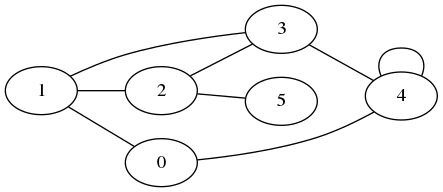

In [2]:
edge_list = {(4,4), (0,4), (1,2), (1,3), 
             (2,3), (2,5), (3,4), (0,1), (0,1)}
print(edge_list)
G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR' # or 'UD'
nxpd.draw(G, show='ipynb')

[(0, 1), (0, 4), (1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (4, 4), (0, 1)]


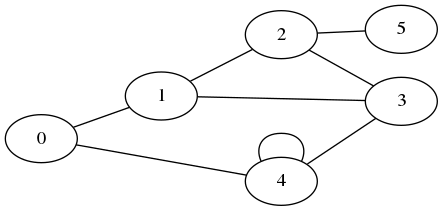

In [3]:
# graph visualizations are not unique
edge_list = [(0,1), (0,4), (1,2), (1,3), 
             (2,3), (2,5), (3,4), (4,4), (0,1)]
print(edge_list)
G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR'
nxpd.draw(G, show='ipynb')

### Data Structures for Graphs

There are three main data structures used for representing a graph.

- **Edge list**: a list of the edges (and weights, if applicable)

- **Adjacency list**: a dictionary containing each node & its list of neighbors.

- **Adjacency matrix**: a square matrix with rows and columns indexed by the nodes.  The entries in the matrix are either $0$ or $1$, depending on whether the nodes are linked with an edge.  [Wikipedia](https://en.wikipedia.org/wiki/Adjacency_matrix)

The *edge list* representation of the graph above is:

In [4]:
g_edg = [
    (0, 1),
    (0, 4),
    (1, 2),
    (1, 3),
    (2, 3),
    (2, 5),
    (3, 4),
    (4, 4),
]

The *adjacency list* representation of the above graph is:

In [5]:
g_adj = {
    0: [1, 4],
    1: [0, 2, 3],
    2: [1, 3, 5],
    3: [1, 2, 4],
    4: [0, 3, 4],
    5: [2]
}

The *adjacency matrix* representation of the above graph is:

In [6]:
g_matrix = np.array([
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0]
])

The Python library's `networkx` and `nxpd` can be used to manipulate and visualize graphs.

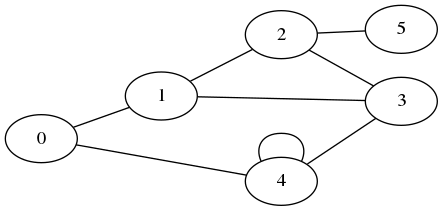

In [7]:
G = nx.from_edgelist(g_edg)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

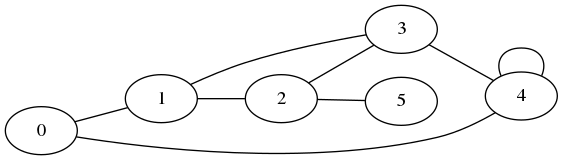

In [8]:
G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

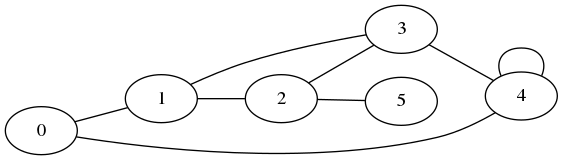

In [9]:
G = nx.from_numpy_matrix(g_matrix)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

### Breakout  


![](images/directed-graph_2.png)

Determine the adjacency matrix for this directed graph.

### Breakout  


![](images/weighted_1.png)
Determine the adjancency matrix for this weighted graph.

### Data Structures for Graphs

- **Adjacency matrix**: a square matrix with rows and columns indexed by the nodes.  The entries in the matrix are either $0$ or $1$, depending on whether the nodes are linked with an edge.  
  - PRO: Easy to understand and interpret
  - CON: "No edge" cells take up same amount of memory as other cells and most networks are low density (online social networks often have density of 0.1%)
  
- **Edge list**: a list of the edges (and weights, if applicable)
  - PRO: Less space in memory for large and sparse networks
  - PRO: Maps easily into SQL databases
  - PRO: Maps easily into text based formats
  - CON: Searching/traversal of graph is slow (iterating over edges)

- **Adjacency list**: a dictionary containing each node & its list of neighbors.
  - PRO: Less space in memory for large and sparse networks
  - PRO: Fast searching and traversal
  - PRO: Easy to add/remove nodes and edges
  - CON: Harder to parse from text
  - CON: Harder to write to databases

**Question:** Which data structure is best for persistent storage? Which data structure is best for internal data representation (working with the graph)?

### Basic Graph Concepts

The **neighbors** of a node are all those connected to it by an edge.

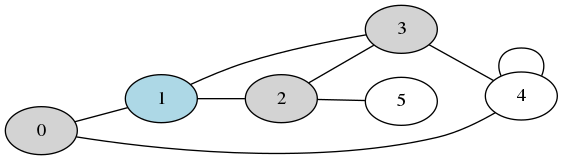

In [10]:
gt.color_nodes(G, [1], 'lightblue')
gt.color_nodes(G, G.neighbors(1), 'lightgrey')
nxpd.draw(G, show='ipynb')

The **degree** of a node is the number of neighbors it has.

$$d(0) = 2$$
$$d(1) = 3$$

A **path** is a series of edges that connect two nodes.

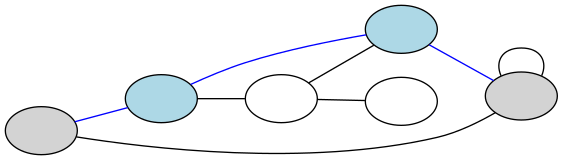

In [11]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 4], 'lightgrey')
gt.color_nodes(G, [1, 3], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4)], 'blue')
nxpd.draw(G, show='ipynb')

A graph is **connected** if every pair of nodes is connected by some path.

A graph is **disconnected** if it is not connected.  In this case, each connected piece of the graph is called a **component**.



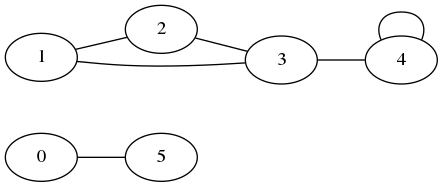

In [12]:
g_disconnected = {
    0: {5},
    1: {2, 3},
    2: {1, 3},
    3: {1, 2, 4},
    4: {3, 4},
    5: {0}
}

G_disconnected = nx.from_dict_of_lists(g_disconnected)
G_disconnected.graph['rankdir'] = 'LR'
nxpd.draw(G_disconnected, show='ipynb')

A **cycle** in a graph is a sequence of edges that returns to the same node from which it began:

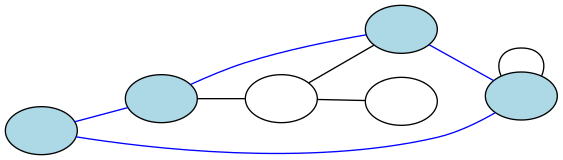

In [13]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 1, 3, 4], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4), (4, 0)], 'blue')
nxpd.draw(G, show='ipynb')

A **tree** is a directed graph with no cycles. (Directed Acyclic Graph - DAG)

In [14]:
def convert_adj_list_to_edge_list(adj_list):
    edge_list = set()
    for node, child_nodes in adj_list.items():
        for child in child_nodes:
            edge_list.add((node, child))
    return edge_list

Adjacency list:
{0: {1, 2}, 1: {3, 4}, 2: {5, 6}, 3: {}, 4: {}, 5: {}, 6: {8, 7}, 7: {}, 8: {}}

Edge list:
{(0, 1), (1, 3), (2, 6), (6, 8), (6, 7), (1, 4), (2, 5), (0, 2)}


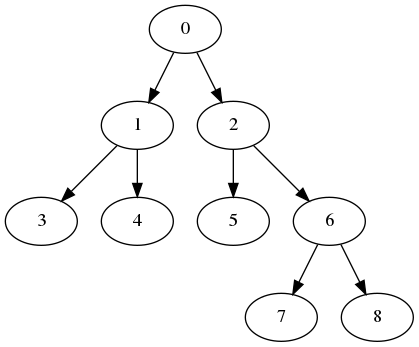

In [15]:
g_tree = {
    0: {1, 2},
    1: {3, 4},
    2: {5, 6},
    3: {},
    4: {},
    5: {},
    6: {7, 8},
    7: {},
    8: {}
}
print("Adjacency list:")
print(g_tree)
g_tree_edge_list = convert_adj_list_to_edge_list(g_tree)
print("\nEdge list:")
print(g_tree_edge_list)
G_tree = nx.DiGraph()
G_tree.add_nodes_from(g_tree)
G_tree.add_edges_from(g_tree_edge_list)
nxpd.draw(G_tree, show='ipynb')

Trees are used as fundamental data structures in computer science:
- Hash tables
- Data bases
- Sorting Algorithms

## Search and Traversal Algorithms for Graphs

(Most often to search a graph, you need to traverse it).

A **traversal algorithm** is a method for visiting every node in a graph.

A **search algorithm** is a method for searching for a specified node in a graph.

These two types of algorithms are almost interchangable: to turn a traversal algorithm into a search algorithm you simply need to provide a stopping criteria (in this case, the node you are searching for).

We will examine traversal algorithms to demonstrate the difference between the methods, but the same ideas apply to the search algorithms.

### Breadth First
In **breadth first** algorithms we traverse the graph by prioritizing visiting all the *neighbors* of nodes before visiting *more neighbors*.

### Depth First
In **depth first** algorithms we traverse the graph by prioritizing visiting a *child* and the *child's child*, iteratively, before backtracking and visiting the *sibling* nodes.

We are using the term child loosely here, as there are no children in a graph, only neighbors.
![](images/b_v_d.png)

### Helpful to graph traversal:  Stack and Queue

Review data structures.  **Stack** and **Queue**.

- Stack:
    - Ordering: Last In, First Out (LIFO)
    - Insertion/Removal of items: Same end of chain
    - Analogy: stack of dishes
- Queue:
    - Ordering: First In, First Out (FIFO) ordering
    - Insertion/Removal of items: Opposite ends of chain (insert at end, remove at front)
    - Analogy: line for movie premiere (if we were British, we'd already use the word queue instead of line)


**Further Reading:** Python docs have short discussion of data structures to use for stacks and queues:
https://docs.python.org/3/tutorial/datastructures.html#data-structures

#### Breadth First Traversal (BFT) Pseudocode.

    Initialize a queue, Q, with starting node.
    Initialize an empty set *V* of visited nodes.

    While Q is not empty:
        Pop (earliest added) node from Q, call it node.
        if node is not already visited.
            Add node to V (the visited set).
            Add every neighbor of node to (the end of) Q.

Real code:

In [16]:
def breadth_first_traversal(G, initial_node):
    Q = deque([initial_node]) # deque is a double-edged queue

    # Using a list to preserve the order nodes were visited.
    visited = [] 

    while len(Q) != 0:
        node = Q.popleft() # pop from the left
        if node not in visited:
            visited.append(node)
            Q.extend(G.neighbors(node)) # extend to the right side

    return visited

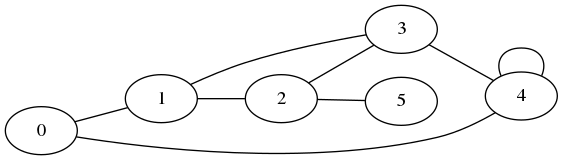

In [17]:
g_adj = {
    0: [1, 4],
    1: [0, 2, 3],
    2: [5, 3, 1],
    3: [1, 2, 4],
    4: [0, 3, 4],
    5: [2]
}

G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

In [18]:
# what order should we visit the nodes starting at node 3?
breadth_first_traversal(G, 3)

[3, 1, 2, 4, 0, 5]

**Question:** What information does the *order nodes are visited* in the breadth first traversal algorithm contain?

**Applications:**

- Shortest path in unweighted graph
- Crawlers in search engines

Today's sprint uses the ideas in this algorithm to compute the shortest path between two nodes.

#### Depth First Traversal (DFT) Pseudocode.

    Initiliaze a stack, S, with initial node
    Initialize an empty set *V* of visited nodes

    While S is not empty:
        Pop (last added) node from S, call it node
        if node is not already visited
            Add node to V (the visited set)
            Add every neighbor of node to (the end of) S

In [19]:
def depth_first_traversal(G, initial_node):
    S = deque([initial_node])

    # Using a list to preserve the order nodes were visited.
    visited = [] 

    while len(S) != 0:
        node = S.pop() # pop from the right
        if node not in visited:
            visited.append(node)
            S.extend(G.neighbors(node)) # extend to the right side

    return visited

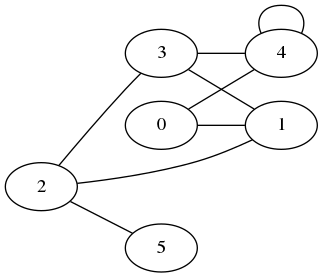

In [20]:
g_adj = {
    0: [1, 4],
    2: [1, 3, 5],
    3: [1, 4, 2],
    4: [4, 3, 0],
    5: [2],
    1: [0, 2, 3],
}

G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

In [21]:
depth_first_traversal(G, 3)

[3, 4, 0, 1, 2, 5]

**Applications:**

- Finding leaf nodes of a tree
- Solving a maze

### Objectives: answer the following

- What is a graph?
- What are some data structures used to represent graphs?
- How do you talk about graphs?
  - Degree
  - Neighbors
  - Path
  - Cycle
  - Components
- What are some types of graphs?
  - Connected vs. disconnected
  - Directed vs. undirected
  - Weighted vs. unweighted
  - Trees
- How do you search / traverse a graph?
  - Breadth First vs Depth First Search